In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#Importamos la base de datos
properati = pd.read_csv("properati.csv")

In [3]:
#Como todas las filas en "operation" son ventas, 
#la columna no añade informacion, por lo que se remueve
properati = properati.drop(columns="operation")

In [4]:
#Por ahora nos deshacemos de las columnas "country_name","geonames_id","lat-lon","lat","lon","place_with_parent_names","place_name","properati_url","image_thumbnail"
properati = properati.drop(columns=["floor","expenses","country_name","geonames_id","lat-lon","lat","lon","place_with_parent_names","place_name","properati_url","image_thumbnail"])

In [5]:
#Se le colocan estandares a las variables para lidiar con datos extremos
properati = properati[properati.price_usd_per_m2 < 8000]

properati = properati[properati.price_usd_per_m2 > 500]

properati = properati[properati.surface_covered_in_m2 < 600]

properati = properati[properati.surface_covered_in_m2 > 30]

properati = properati[properati.surface_total_in_m2 > 30]

properati = properati[properati.surface_total_in_m2 < 1000]

properati.shape

(53056, 14)

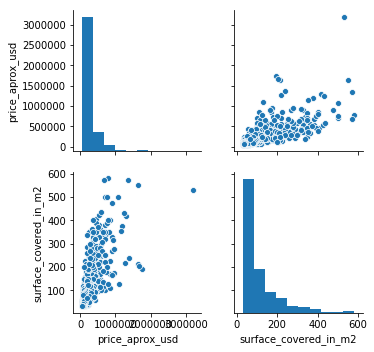

In [6]:
sns.pairplot(properati[["price_aprox_usd","surface_covered_in_m2"]].sample(800))


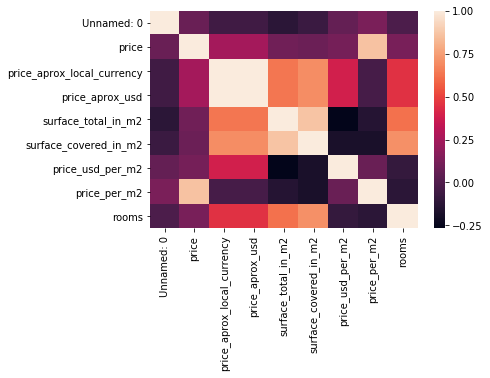

In [7]:
sns.heatmap(properati.corr())

In [8]:
#Dummies de las columnas listas
properati = pd.get_dummies(properati,["prop_type","curr"],columns=["property_type","currency"])


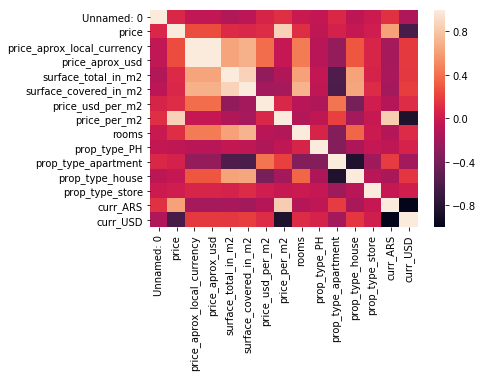

In [9]:
sns.heatmap(properati.corr())

In [10]:
prop_test = properati[["title"]]

#prop_test
#str.find()


def cuenta_ambientes(string):
    #programa para contar la cantidad de ambientes en title o descripcion
    
    existe_amb = string.find(" amb ")
    
    if existe_amb == -1:
        existe_amb = string.find(" amb. ")
    
    if existe_amb == -1:
        existe_amb = string.find(" AMB ")
    
    if existe_amb == -1:
        existe_amb = string.find(" AMB. ")

    if existe_amb == -1:
        existe_amb = string.find(" AMBIENTES")
    
    if existe_amb == -1:
        existe_amb = string.find(" ambientes")
    
    if existe_amb == -1:
        existe_amb = string.find(" ambiente ")
        
#    if existe_amb == -1:
#        existe_amb = string.find(" ambientes ")    
        
    if existe_amb == -1:
        if string.find(" monoambiente") != -1:
            return 1
    if existe_amb == -1:
        if string.find(" MONOAMBIENTE") != -1:
            return 1
        
    try: 
        int(string[existe_amb - 1])
    except:
        existe_amb = -1
        pass
        
    if existe_amb != -1:
        return string[existe_amb - 1]
    else:
        return np.nan

    
c = prop_test.applymap(cuenta_ambientes)
c.dropna().shape
#d = prop_test.sample(10).applymap(cuenta_ambientes)
#d.dropna().shape

(10050, 1)

In [ ]:
properati["rooms"].fillna(c["title"],inplace=True)

In [11]:
properati.isnull().sum()

Unnamed: 0                        0
state_name                        0
price                             0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2               0
surface_covered_in_m2             0
price_usd_per_m2                  0
price_per_m2                      0
rooms                         33936
description                       0
title                             0
prop_type_PH                      0
prop_type_apartment               0
prop_type_house                   0
prop_type_store                   0
curr_ARS                          0
curr_USD                          0
dtype: int64

In [12]:
properati = properati.drop(columns="rooms")

In [32]:
prop_test = properati.state_name
for i in prop_test.iloc[0]:
    if i in ["Buenos Aires Interior","Santa Fe","Córdoba","Bs.As. G.B.A. Zona Oeste","Buenos Aires Costa Atlántica","Bs.As. G.B.A. Zona Sur","Bs.As. G.B.A. Zona Norte","Capital Federal"]:
        print("yey!")
        

In [24]:
properati[["state_name","price"]].groupby("state_name").count().sort_values("price")

,price
state_name,
Jujuy,1
Santiago Del Estero,1
San Juan,1
Catamarca,2
Santa Cruz,5
La Pampa,9
Chaco,18
Tierra Del Fuego,20
Chubut,28


In [13]:
properati.to_csv("properati_Tasado_Lineal.csv", encoding='utf-8', index=False)